In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Задача 1 (метод Якоби)

In [73]:
def get_LDU(M):
    D = np.diag(M) * np.eye(M.shape[0])
    U = np.triu(M) - D
    L = np.tril(M) - D
    return L, D, U

In [210]:
def get_jacobi_Rb(M, f):
    L, D, U = get_LDU(M)
    R = -np.linalg.inv(D) @ (L + U)
    b = np.linalg.inv(D) @ f
    return R, b

def check_jacobi_converg(M):
    L, D, U = get_LDU(M)
    return np.sum(np.abs(D))/np.sum(np.abs(U + L))

In [260]:
def jacobi_solve(M, f, eps, flag=False):
    R, b = get_jacobi_Rb(M, f)
    
    x = np.random.random(M.shape[0])
    step = 0
    while (np.linalg.norm(M@x-f) > eps):
        step += 1
        if np.linalg.norm(x) > 1e3 or step > 1e5:
            print("метод Якоби расходится: z={:.2f} ~ 1\nstep: {}".format(check_jacobi_converg(M), step))
            break

        x = R@x + b
    
    if flag: return x, step
    else: return x

Проверим, что метод работает, и посмотрим как быстро.

In [212]:
## dim = 30

M = np.random.random((dim, dim)) + np.eye(dim) * dim*(dim-1)
f  = np.ones(dim)

M = np.round(M, 2)
# print(M)

true_ans = np.linalg.solve(M, f)
# print(true_ans)

ans, step = jacobi_solve(M, f, 1e-6, True)
# print(ans)

print("количество шагов:", step)
print("невязка:          {:.2e}".format(np.linalg.norm(ans-true_ans)))

количество шагов: 6
невязка:          5.14e-11


## Решение системы

In [247]:
def get_Mf(n, alpha):
    
    f = np.zeros(n)
    f[0] = 1-alpha
    f[n-1]=1+alpha

    M = np.zeros((n, n))
    M += 2 * np.eye(n)
    for i in range(2-1, n-1):
#     for i in range(0, n-1):
        M[i, i+1] = -1-alpha
#     for i in range(1, n):
        M[i, i-1] = -1+alpha
    return M, f

Заметим, что при $\alpha \in [-1, 1]$ в матрице есть строгое диагональное преобладание, так что, по идее, там метод Якоби (и Зейделя) должен сходиться.

In [252]:
n = 4
alpha = 0.5

M, f = get_Mf(n, alpha)
print(M)

L, D, U = get_LDU(M)
np.sum(np.abs(D))/np.sum(np.abs(U + L))

[[ 2.   0.   0.   0. ]
 [-0.5  2.  -1.5  0. ]
 [ 0.  -0.5  2.  -1.5]
 [ 0.   0.   0.   2. ]]


2.0

Проверим это прямым вычислением.

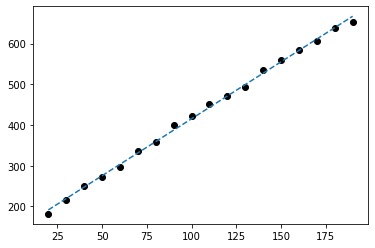

In [297]:
# зависимость от n
alpha = 0.5
rep = 2
ns = range(20, 200, 10)

steps = []
for n in ns:
    M, f = get_Mf(n, alpha)
    step_ = 0
    for _ in range(rep):
        ans, step = jacobi_solve(M, f, 1e-10, True)
        step_ += step/rep 
    steps.append(step_)
    
x = np.array(ns)
y = np.array(steps)
coeff = np.polyfit(x, y, 1)
    
plt.scatter(ns, steps, color="k")
plt.plot(x, np.poly1d(coeff)(x), "--")
plt.show()

In [368]:
# зависимость от alpha
alphas = np.linspace(-1.45, 1.45, 200)
rep = 10
n = 10

steps_jacobi = []
for alpha in alphas:
    M, f = get_Mf(n, alpha)
    step_ = 0
    for _ in range(rep):
        ans, step = jacobi_solve(M, f, 1e-10, True)
        step_ += step/rep 
    steps_jacobi.append(step_)

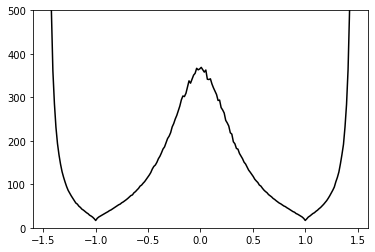

In [370]:
plt.plot(alphas, steps_jacobi, color="k")
plt.ylim(0, 500)
plt.show()

In [384]:
M

array([[ 2.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  2.]])

In [383]:
# точное решение
n = 5

alpha = 1
M, f = get_Mf(n, alpha)
print(alpha, np.linalg.solve(M, f))

alpha = -1
M, f = get_Mf(n, alpha)
print(alpha, np.linalg.solve(M, f))

alpha = 0
M, f = get_Mf(n, alpha)
print(alpha, np.linalg.solve(M, f))

1 [0. 1. 1. 1. 1.]
-1 [1. 1. 1. 1. 0.]
0 [0.5 0.5 0.5 0.5 0.5]


Если сделать матрицу ленточной, то решением будет вектор вида $x = [1,\, 1,\, \ldots, 1]$.

# Задача 2

In [327]:
def get_seidel_Rb(M, f):
    L, D, U = get_LDU(M)
    R = -np.linalg.inv(L+D) @ (U)
    b = np.linalg.inv(L+D) @ f
    return R, b

def seidel_solve(M, f, eps, flag=False):
    R, b = get_seidel_Rb(M, f)
    
    x = np.random.random(M.shape[0])
    step = 0
    while (np.linalg.norm(M@x-f) > eps):
        step += 1
        if np.linalg.norm(x) > 1e3 or step > 1e5:
            print("метод Зейделя расходится: z={:.2f} ~ 1\nstep: {}".format(check_jacobi_converg(M), step))
            break

        x = R@x + b
    
    if flag: return x, step
    else: return x

In [350]:
dim = 3000

M = np.random.random((dim, dim)) + np.eye(dim) * dim
f  = np.ones(dim)

M = np.round(M, 2)
# print(M)

true_ans = np.linalg.solve(M, f)
# print(true_ans)

ans1, step1 = seidel_solve(M, f, 1e-10, True)
ans2, step2 = jacobi_solve(M, f, 1e-10, True)
# print(ans)

print("количество шагов (Зейдель):", step1)
print("количество шагов (Якоби):  ", step2)
print("невязка:          {:.2e}".format(np.linalg.norm(ans1-true_ans)))
print("невязка:          {:.2e}".format(np.linalg.norm(ans2-true_ans)))

количество шагов (Зейдель): 16
количество шагов (Якоби):   51
невязка:          1.61e-14
невязка:          1.20e-14


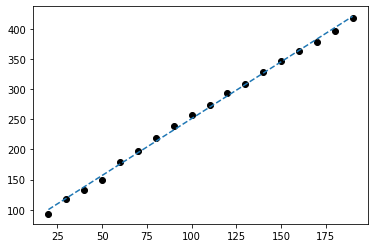

In [351]:
# зависимость от n
alpha = 0.5
rep = 1
ns = range(20, 200, 10)

steps = []
for n in ns:
    M, f = get_Mf(n, alpha)
    step_ = 0
    for _ in range(rep):
        ans, step = seidel_solve(M, f, 1e-10, True)
        step_ += step/rep 
    steps.append(step_)
    
x = np.array(ns)
y = np.array(steps)
coeff = np.polyfit(x, y, 1)
    
plt.scatter(ns, steps, color="k")
plt.plot(x, np.poly1d(coeff)(x), "--")
plt.show()

In [372]:
# зависимость от alpha
alphas = np.linspace(-1.45, 1.45, 200)
rep = 10
n = 10

steps_seidel = []
for alpha in alphas:
    M, f = get_Mf(n, alpha)
    step_ = 0
    for _ in range(rep):
        ans, step = seidel_solve(M, f, 1e-10, True)
        step_ += step/rep 
    steps_seidel.append(step_)

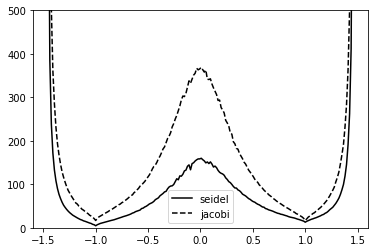

In [377]:
plt.plot(alphas, steps_seidel, color="k", label="seidel")
plt.plot(alphas, steps_jacobi, "--", color="k", label="jacobi")
plt.ylim(0, 500)
plt.legend()
plt.show()

# Задача 3

см. [pdf-файл](https://github.com/k1242/notes_5sem/blob/main/comp_math/theory_hw/comp_math_hw.pdf) с заданием

# Задача 4

In [592]:
def relax_solve(M, f, tau, eps, flag=False):
    R, b = get_seidel_Rb(M, f)
    
    x = np.random.random(M.shape[0])
    step = 0
    while (np.linalg.norm(M@x-f) > eps):
        step += 1
        if np.linalg.norm(x) > 1e3 or step > 1e5:
#             print("метод релаксации расходится: z={:.2f} ~ 1\nstep: {}".format(check_jacobi_converg(M), step))
            if flag: return x, -10
            else: return x
            break

        z = R@x + b
        x = x + tau * (z - x)
    
    if flag: return x, step
    else: return x

In [593]:
dim = 100
tau = 1

M = np.random.random((dim, dim)) + np.eye(dim) * dim
f  = np.ones(dim)

M = np.round(M, 2)
# print(M)

true_ans = np.linalg.solve(M, f)
# print(true_ans)

ans1, step1 = seidel_solve(M, f, 1e-10, True)
ans2, step2 = jacobi_solve(M, f, 1e-10, True)
ans3, step3 =  relax_solve(M, f, tau, 1e-10, True)
# print(ans)

print("количество шагов (Зейдель):   ", step1)
print("количество шагов (Якоби):     ", step2)
print("количество шагов (релаксации):", step3)
print("невязка:          {:.2e}".format(np.linalg.norm(ans1-true_ans)))
print("невязка:          {:.2e}".format(np.linalg.norm(ans2-true_ans)))
print("невязка:          {:.2e}".format(np.linalg.norm(ans3-true_ans)))

количество шагов (Зейдель):    14
количество шагов (Якоби):      43
количество шагов (релаксации): 14
невязка:          1.76e-13
невязка:          3.49e-13
невязка:          1.58e-13


In [739]:
# зависимость от tau
taus = np.linspace(0.15, 2.0, 100)
rep = 1
dim = 10

alphas = np.linspace(-3, 3, 100)
steps_relax_alphas = []
for alpha in alphas:
    steps_relax = []
    for tau in taus:
        step_ = 0
        M, f = get_Mf(n, alpha)
        for _ in range(rep):
            ans, step = relax_solve(M, f, tau, 1e-10, True)
            step_ += step/rep 
        steps_relax.append(step_)
    steps_relax_alphas.append(steps_relax)

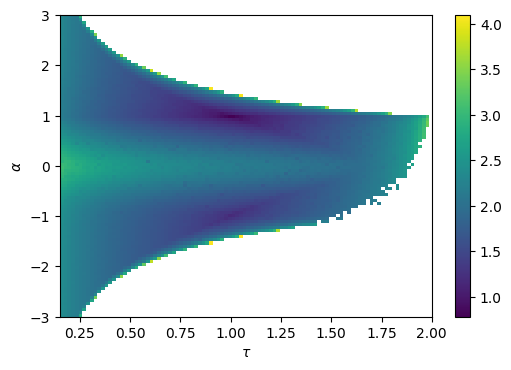

In [740]:
im = np.array(steps_relax_alphas)
im[im < 0] = None
im = np.log10(im)

fig, ax = plt.subplots(dpi=100)
plt.imshow(im, interpolation='none',
           extent=[np.min(taus),np.max(taus),np.min(alphas),np.max(alphas)],
           aspect=1/4)
plt.colorbar(orientation='vertical')
plt.xlabel("$\\tau$")
plt.ylabel("$\\alpha$")
plt.show()

# Задача 5

In [635]:
def get_uprelax_Rb(M, f, tau):
    L, D, U = get_LDU(M)
    R = -np.linalg.inv(tau * L + D) @ (U + (1 - tau) * L)
    b = np.linalg.inv(tau * L + D) @ f
    return R, b


def uprelax_solve(M, f, tau, eps, flag=False):
    R, b = get_uprelax_Rb(M, f, tau)

    x = np.random.random(M.shape[0])
    step = 0
    while (np.linalg.norm(M @ x - f) > eps):
        step += 1
        if np.linalg.norm(x) > 1e3 or step > 1e5:
#             print("метод верхней релаксации расходится: z={:.2f} ~ 1\nstep: {}".format(
#                 check_jacobi_converg(M), step))
            if flag: return x, -10
            else: return x
            break

        x = R@x + b

    if flag:
        return x, step
    else:
        return x

In [638]:
dim = 10
tau = 0.1

M = np.random.random((dim, dim)) + np.eye(dim) * dim
f  = np.ones(dim)
M = np.round(M, 2)

true_ans = np.linalg.solve(M, f)
ans4, step4 =  uprelax_solve(M, f, tau, 1e-10, True)

print("количество шагов (up релаксации):", step4)
print("невязка:          {:.2e}".format(np.linalg.norm(ans4-true_ans)))

количество шагов (up релаксации): 26
невязка:          4.54e-12


In [723]:
# зависимость от tau
taus = np.linspace(-3.0, 3.0, 100)
rep = 1
n = 10

alphas = np.linspace(-2, 2, 100)
steps_relax_alphas = []
for alpha in alphas:
    steps_relax = []
    for tau in taus:
        step_ = 0
        M, f = get_Mf(n, alpha)
        for _ in range(rep):
            ans, step = uprelax_solve(M, f, tau, 1e-10, True)
            step_ += step/rep 
        steps_relax.append(step_)
    steps_relax_alphas.append(steps_relax)

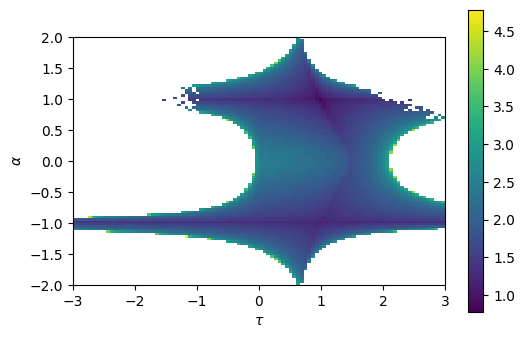

In [724]:
im = np.array(steps_relax_alphas)
im[im < 0] = None
im = np.log10(im)

fig, ax = plt.subplots(dpi=100)
plt.imshow(im, interpolation='none',
           extent=[np.min(taus),np.max(taus),np.min(alphas),np.max(alphas)],
           aspect=1)
plt.colorbar(orientation='vertical')
plt.xlabel("$\\tau$")
plt.ylabel("$\\alpha$")
plt.show()

Красота!)

# Задача 6

## МПИ

In [742]:
def get_mpi_Rb(M, f, tau):
    R = np.eye(M.shape[0]) - tau * M
    b = tau * f
    return R, b


def mpi_solve(M, f, tau, eps, flag=False):
    R, b = get_mpi_Rb(M, f, tau)

    x = np.random.random(M.shape[0])
    step = 0
    while (np.linalg.norm(M @ x - f) > eps):
        step += 1
        if np.linalg.norm(x) > 1e3 or step > 1e4:
#             print("метод простой итерации расходится: z={:.2f} ~ 1\nstep: {}".format(
#                 check_jacobi_converg(M), step))
            if flag: return x, -10
            else: return x
            break

        x = R@x + b

    if flag:
        return x, step
    else:
        return x

In [731]:
dim = 10
tau = 0.08

M = np.random.random((dim, dim)) + np.eye(dim) * dim
f  = np.ones(dim)
M = np.round(M, 2)

true_ans = np.linalg.solve(M, f)
ans5, step5 =  mpi_solve(M, f, tau, 1e-10, True)

print("количество шагов (up релаксации):", step5)
print("невязка:          {:.2e}".format(np.linalg.norm(ans5-true_ans)))

количество шагов (up релаксации): 19
невязка:          4.15e-12


In [751]:
# зависимость от tau
taus = np.linspace(0, 0.9, 100)
rep = 1
n = 10

alphas = np.linspace(-3., 3., 100)
steps_relax_alphas = []
for alpha in alphas:
    steps_relax = []
    for tau in taus:
        step_ = 0
        M, f = get_Mf(n, alpha)
        for _ in range(rep):
            ans, step = mpi_solve(M, f, tau, 1e-10, True)
            step_ += step/rep 
        steps_relax.append(step_)
    steps_relax_alphas.append(steps_relax)

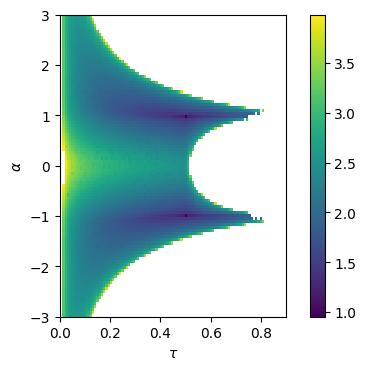

In [754]:
im = np.array(steps_relax_alphas)
im[im < 0] = None
im = np.log10(im)

fig, ax = plt.subplots(dpi=100)
plt.imshow(im, interpolation='none',
           extent=[np.min(taus),np.max(taus),np.min(alphas),np.max(alphas)],
           aspect=1/5)
plt.colorbar(orientation='vertical')
plt.xlabel("$\\tau$")
plt.ylabel("$\\alpha$")
plt.show()

Таким образом реализовали метод простой итерации, и посмотрели сколько необходимо шагов на решение задачи. 

При $\tau \to 0$  увеличивается устойчивость алгоритма, но он существенно замедляется.

## ускорение Чебышева

In [918]:
def сhebyshev_mpi_solve(M, f, tau, eps, flag=False):
    R, b = get_mpi_Rb(M, f, tau)
    rho = np.abs(R[0][0]) # R верхнетреугольная, в общем виде это работать не будет, нужно взять другое число
                          # то есть значение выюрано специфично под задачу B4.1
    
    def do_step_0():
        x0 = np.random.random(M.shape[0]);

        y_b = x0;
        y_ = R@y_b + b;

        mu_  = rho
        mu_b = 1

        # завершение шага
        y_bb = y_b
        y_b  = y_

        mu_bb = mu_b
        mu_b  = mu_
        
        return y_bb, y_b, mu_bb, mu_b
    
    
    def do_step(y_bb, y_b, mu_bb, mu_b):
        mu_ = (2/rho/mu_b - 1/mu_bb)**(-1)

        y_ = 2/rho * mu_/mu_b * R@y_b - \
            mu_/mu_bb * y_bb + \
            2/rho * mu_/mu_b * b

        # завершение шага
        y_bb = y_b
        y_b  = y_

        mu_bb = mu_b
        mu_b  = mu_
        return y_bb, y_b, mu_bb, mu_b
    
    
    
    y_bb, y_b, mu_bb, mu_b = do_step_0()
    
    step = 0
    while (np.linalg.norm(M @ y_b - f) > eps):
        step += 1
        if np.linalg.norm(y_b) > 1e3 or step > 1e4 or np.isnan(y_b).any():
#             print("ускоренный метод простой итерации расходится")
            if flag: return x, -10
            else: return x
            break
            
        y_bb, y_b, mu_bb, mu_b = do_step(y_bb, y_b, mu_bb, mu_b)

    if flag:
        return y_b, step
    else:
        return y_b

*Мысль*: с ускоренеием чебышева метод становится гораздо менее чувствителен к параметру $\tau$.

In [924]:
# решили
alpha = 0.5
# alpha = 5
tau   = 0.05

n = 10

M, f = get_Mf(n, alpha)
ans, step_che = сhebyshev_mpi_solve(M, f, tau, 1e-10, True)
_, step_mpi = mpi_solve(M, f, tau, 1e-10, True)

print(np.round(np.linalg.solve(M, f), 2))
print(np.round(ans, 2))
print("чебышев+mpi #steps:", step_che)
print("        mpi #steps:", step_mpi)

[0.25 0.58 0.69 0.73 0.74 0.75 0.75 0.75 0.75 0.75]
[0.25 0.58 0.69 0.73 0.74 0.75 0.75 0.75 0.75 0.75]
чебышев+mpi #steps: 515
        mpi #steps: 1242


In [921]:
# зависимость от tau
taus = np.linspace(0, 0.9, 100)
rep = 1
n = 10

alphas = np.linspace(-3., 3., 100)
steps_relax_alphas = []
for alpha in alphas:
    steps_relax = []
    for tau in taus:
        step_ = 0
        M, f = get_Mf(n, alpha)
        for _ in range(rep):
            ans, step = сhebyshev_mpi_solve(M, f, tau, 1e-10, True)
            step_ += step/rep 
        steps_relax.append(step_)
    steps_relax_alphas.append(steps_relax)

D:\Apps\Anaconda\envs\TF21\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
D:\Apps\Anaconda\envs\TF21\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
D:\Apps\Anaconda\envs\TF21\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
D:\Apps\Anaconda\envs\TF21\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
D:\Apps\Anaconda\envs\TF21\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
D:\Apps\Anaconda\envs\TF21\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars


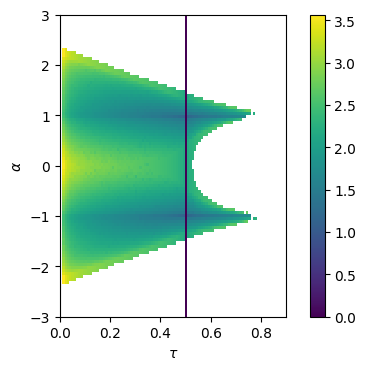

In [922]:
im = np.array(steps_relax_alphas)
im[im < 0] = None
im = np.log10(im)

fig, ax = plt.subplots(dpi=100)
plt.imshow(im, interpolation='none',
           extent=[np.min(taus),np.max(taus),np.min(alphas),np.max(alphas)],
           aspect=1/5)
plt.colorbar(orientation='vertical')
plt.xlabel("$\\tau$")
plt.ylabel("$\\alpha$")
plt.show()